In [2]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv(
    r"C:\Users\goutham\OneDrive\Documents\ML PROJECTS\hr analysis\global_clean_hr.csv"
)


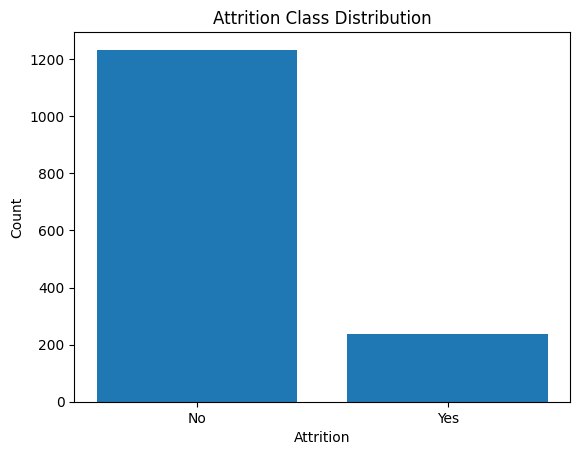

In [3]:
attrition_counts = df["Attrition"].value_counts()

plt.figure()
plt.bar(attrition_counts.index.astype(str), attrition_counts.values)
plt.xlabel("Attrition")
plt.ylabel("Count")
plt.title("Attrition Class Distribution")
plt.show()


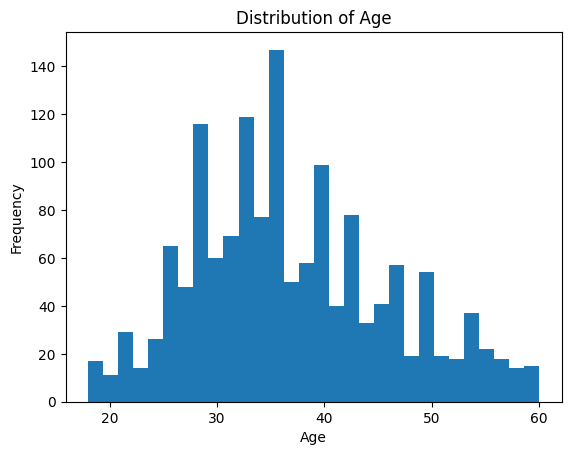

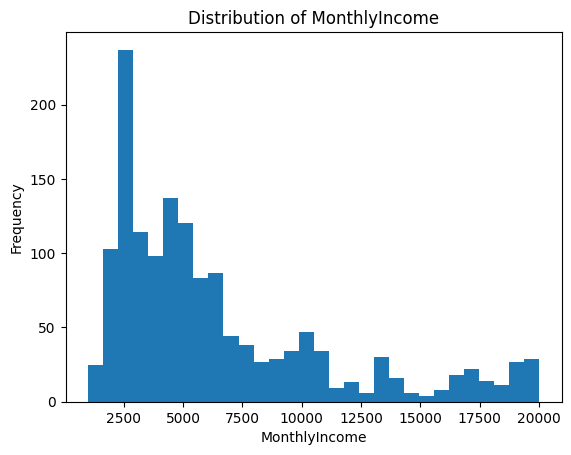

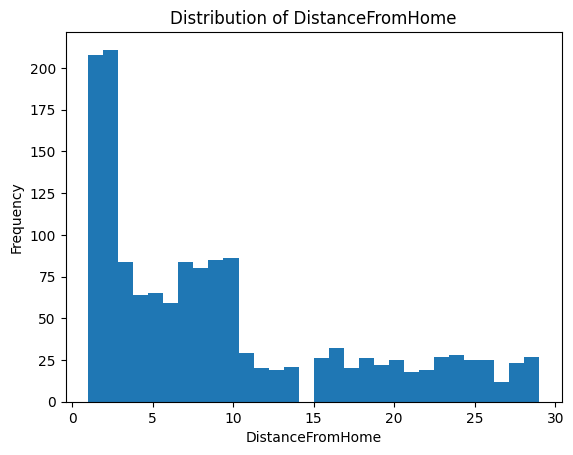

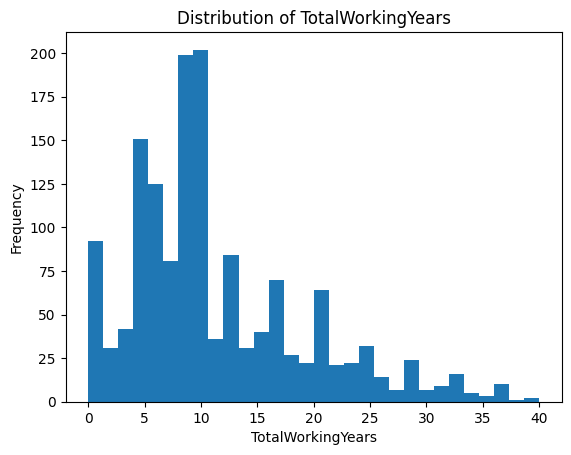

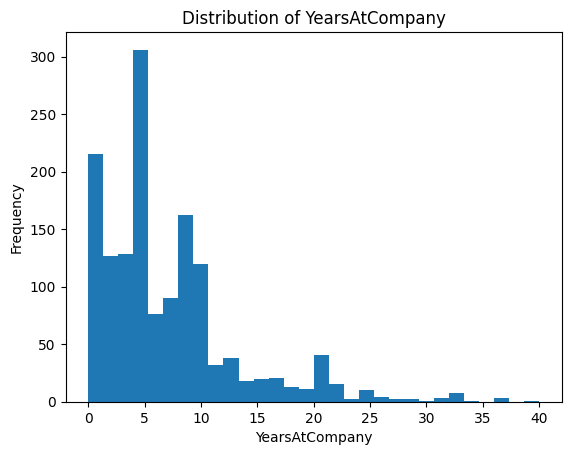

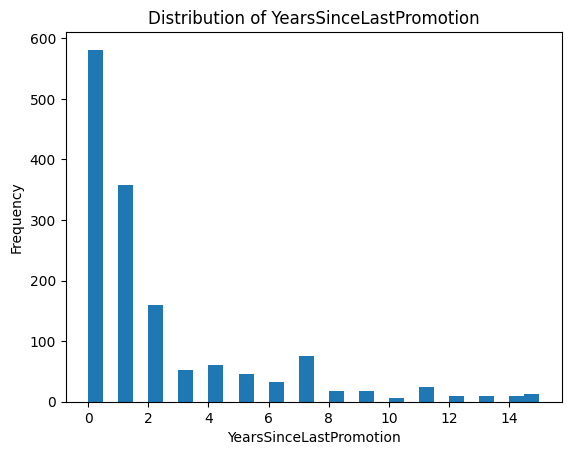

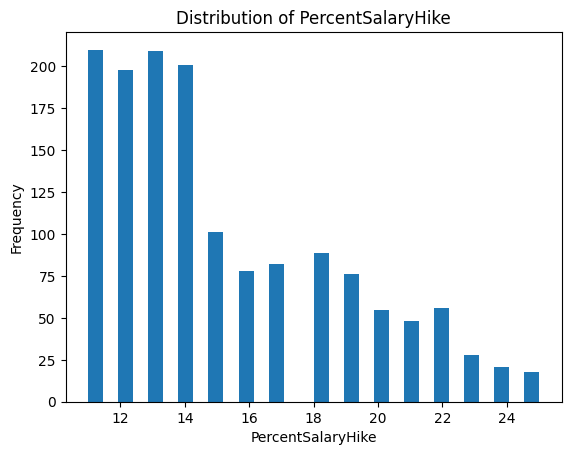

In [4]:
numeric_features = [
    "Age",
    "MonthlyIncome",
    "DistanceFromHome",
    "TotalWorkingYears",
    "YearsAtCompany",
    "YearsSinceLastPromotion",
    "PercentSalaryHike"
]

for col in numeric_features:
    plt.figure()
    plt.hist(df[col], bins=30)
    plt.xlabel(col)
    plt.ylabel("Frequency")
    plt.title(f"Distribution of {col}")
    plt.show()


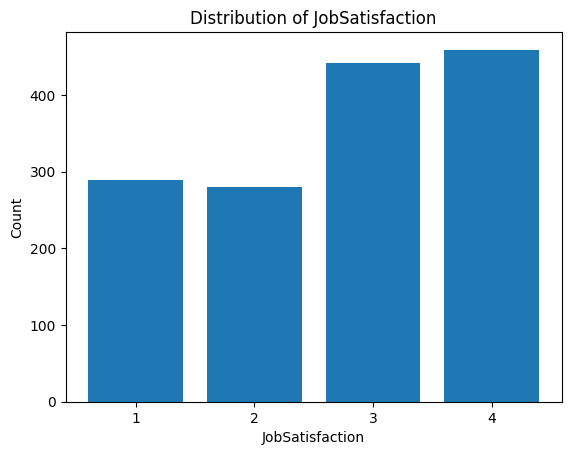

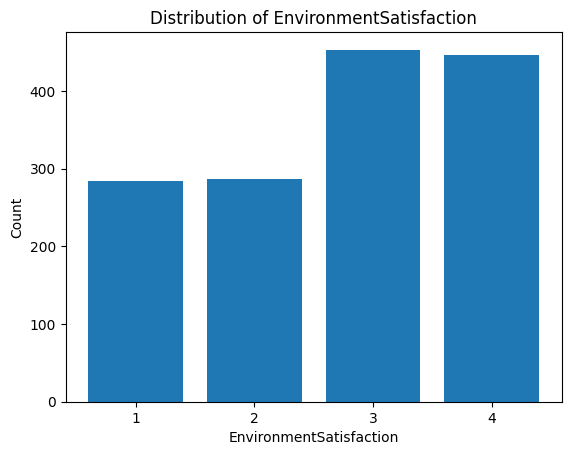

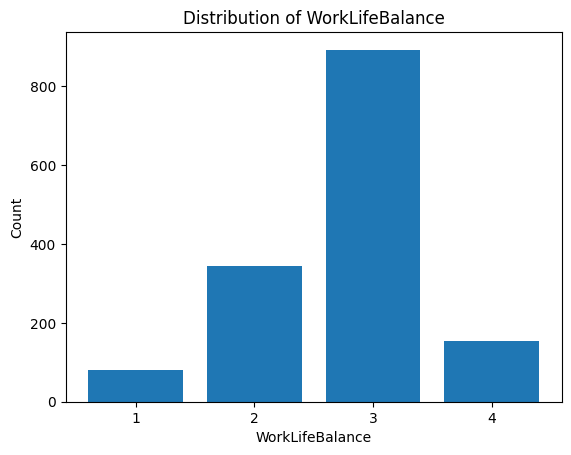

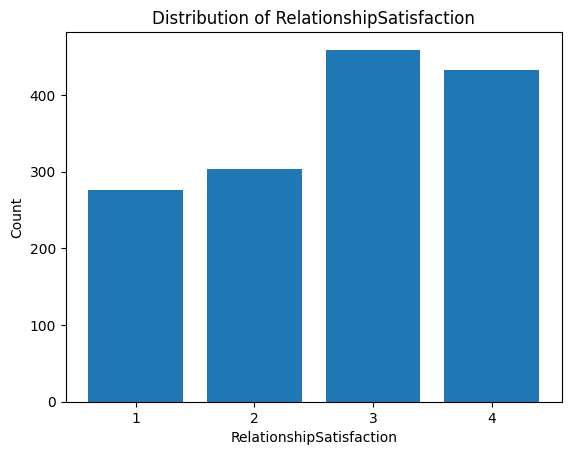

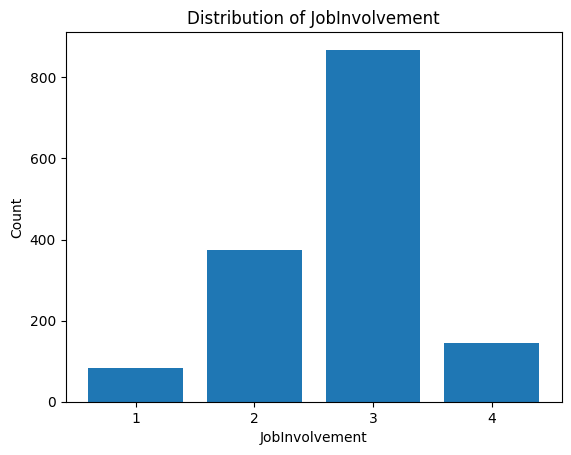

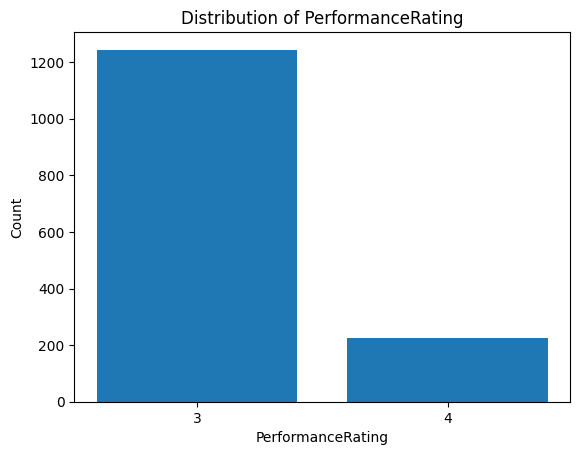

In [5]:
ordinal_features = [
    "JobSatisfaction",
    "EnvironmentSatisfaction",
    "WorkLifeBalance",
    "RelationshipSatisfaction",
    "JobInvolvement",
    "PerformanceRating"
]

for col in ordinal_features:
    counts = df[col].value_counts().sort_index()
    plt.figure()
    plt.bar(counts.index.astype(str), counts.values)
    plt.xlabel(col)
    plt.ylabel("Count")
    plt.title(f"Distribution of {col}")
    plt.show()


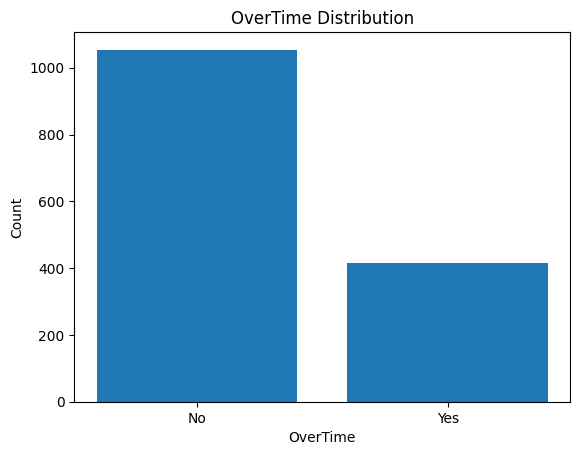

In [6]:
overtime_counts = df["OverTime"].value_counts()

plt.figure()
plt.bar(overtime_counts.index.astype(str), overtime_counts.values)
plt.xlabel("OverTime")
plt.ylabel("Count")
plt.title("OverTime Distribution")
plt.show()


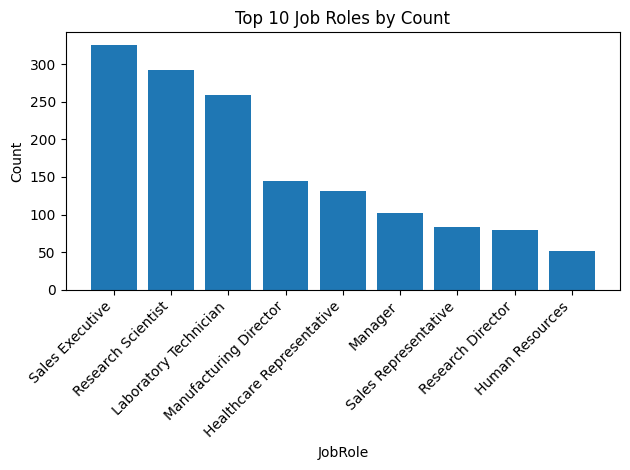

In [7]:
jobrole_counts = df["JobRole"].value_counts().head(10)

plt.figure()
plt.bar(jobrole_counts.index.astype(str), jobrole_counts.values)
plt.xlabel("JobRole")
plt.ylabel("Count")
plt.title("Top 10 Job Roles by Count")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()


In [8]:
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,2,Female,...,3,1,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,3,Male,...,4,4,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,4,Male,...,3,2,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,4,Female,...,3,3,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,Male,...,3,4,1,6,3,3,2,2,2,2


In [9]:
# Print all column names (features)
for col in df.columns:
    print(col)


Age
Attrition
BusinessTravel
DailyRate
Department
DistanceFromHome
Education
EducationField
EnvironmentSatisfaction
Gender
HourlyRate
JobInvolvement
JobLevel
JobRole
JobSatisfaction
MaritalStatus
MonthlyIncome
MonthlyRate
NumCompaniesWorked
OverTime
PercentSalaryHike
PerformanceRating
RelationshipSatisfaction
StockOptionLevel
TotalWorkingYears
TrainingTimesLastYear
WorkLifeBalance
YearsAtCompany
YearsInCurrentRole
YearsSinceLastPromotion
YearsWithCurrManager


In [10]:
from sklearn.model_selection import train_test_split

# Separate features and target
X = df.drop("Attrition", axis=1)
y = df["Attrition"]

# Stratified split
X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.2,        # 80% train, 20% test
    stratify=y,           # IMPORTANT: stratification on target
    random_state=42
)

# Check distribution (optional but recommended)
print("Train target distribution:")
print(y_train.value_counts(normalize=True))

print("\nTest target distribution:")
print(y_test.value_counts(normalize=True))


Train target distribution:
Attrition
No     0.838435
Yes    0.161565
Name: proportion, dtype: float64

Test target distribution:
Attrition
No     0.840136
Yes    0.159864
Name: proportion, dtype: float64


In [11]:
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import StratifiedKFold, cross_val_predict
from sklearn.metrics import roc_auc_score

# --------------------------------
# Use ONLY numeric features
# --------------------------------
numeric_cols = X_train.select_dtypes(include=["int64", "float64"]).columns
Xtr = X_train[numeric_cols]
ytr = y_train

# --------------------------------
# 5-Fold CV  → 4 train / 1 validation
# --------------------------------
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

model = LogisticRegression(max_iter=1000)

# --------------------------------
# 1️⃣ MEAN IMPUTATION
# --------------------------------
mean_imputer = SimpleImputer(strategy="mean")
Xtr_mean = mean_imputer.fit_transform(Xtr)   # fit ONLY on training data

mean_probs = cross_val_predict(
    model,
    Xtr_mean,
    ytr,
    cv=cv,
    method="predict_proba"
)[:, 1]

roc_mean = roc_auc_score(ytr, mean_probs)

# --------------------------------
# 2️⃣ MEDIAN IMPUTATION
# --------------------------------
median_imputer = SimpleImputer(strategy="median")
Xtr_median = median_imputer.fit_transform(Xtr)  # fit ONLY on training data

median_probs = cross_val_predict(
    model,
    Xtr_median,
    ytr,
    cv=cv,
    method="predict_proba"
)[:, 1]

roc_median = roc_auc_score(ytr, median_probs)

# --------------------------------
# Results
# --------------------------------
print("TRAIN ROC-AUC (Mean Imputation)  :", roc_mean)
print("TRAIN ROC-AUC (Median Imputation):", roc_median)


C:\Users\goutham\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\linear_model\_logistic.py:473: ConvergenceWarning: lbfgs failed to converge after 1000 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=1000).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\goutham\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\linear_model\_logistic.py:473: ConvergenceWarning: lbfgs failed to converge after 1000 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=1000).
You might also want to scale the data as shown in:
    https

TRAIN ROC-AUC (Mean Imputation)  : 0.739356250667236
TRAIN ROC-AUC (Median Imputation): 0.739356250667236


C:\Users\goutham\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\linear_model\_logistic.py:473: ConvergenceWarning: lbfgs failed to converge after 1000 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=1000).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [12]:
import pandas as pd
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder

# -----------------------------
# 1️⃣ Define column groups
# -----------------------------

numeric_cols = X_train.select_dtypes(include=["int64", "float64"]).columns.tolist()
categorical_cols = X_train.select_dtypes(include=["object"]).columns.tolist()

# Ordinal columns are already numeric and meaningful → kept as-is

# -----------------------------
# 2️⃣ NUMERIC → Median Imputation
# -----------------------------

num_imputer = SimpleImputer(strategy="median")

X_train_num = num_imputer.fit_transform(X_train[numeric_cols])   # FIT on TRAIN
X_test_num  = num_imputer.transform(X_test[numeric_cols])        # TRANSFORM TEST

X_train_num = pd.DataFrame(X_train_num, columns=numeric_cols, index=X_train.index)
X_test_num  = pd.DataFrame(X_test_num, columns=numeric_cols, index=X_test.index)

# -----------------------------
# 3️⃣ CATEGORICAL → One-Hot Encoding (FIXED)
# -----------------------------

cat_imputer = SimpleImputer(strategy="most_frequent")

# IMPORTANT: keep as DataFrame after imputation
X_train_cat = pd.DataFrame(
    cat_imputer.fit_transform(X_train[categorical_cols]),
    columns=categorical_cols,
    index=X_train.index
)

X_test_cat = pd.DataFrame(
    cat_imputer.transform(X_test[categorical_cols]),
    columns=categorical_cols,
    index=X_test.index
)

ohe = OneHotEncoder(handle_unknown="ignore", sparse_output=False)

X_train_cat_ohe = ohe.fit_transform(X_train_cat)   # FIT on TRAIN
X_test_cat_ohe  = ohe.transform(X_test_cat)        # TRANSFORM TEST

cat_feature_names = ohe.get_feature_names_out(categorical_cols)

X_train_cat_ohe = pd.DataFrame(
    X_train_cat_ohe, columns=cat_feature_names, index=X_train.index
)

X_test_cat_ohe = pd.DataFrame(
    X_test_cat_ohe, columns=cat_feature_names, index=X_test.index
)

# -----------------------------
# 4️⃣ Combine ALL features
# -----------------------------

X_train_final = pd.concat([X_train_num, X_train_cat_ohe], axis=1)
X_test_final  = pd.concat([X_test_num, X_test_cat_ohe], axis=1)

# -----------------------------
# Final outputs ready
# -----------------------------
print("Train shape:", X_train_final.shape)
print("Test shape :", X_test_final.shape)


Train shape: (1176, 51)
Test shape : (294, 51)


In [13]:
import pandas as pd

train_df = X_train.copy()
train_df["Attrition"] = y_train


In [14]:
numeric_cols = train_df.select_dtypes(include=["int64", "float64"]).columns
categorical_cols = train_df.select_dtypes(include=["object"]).columns.drop("Attrition")


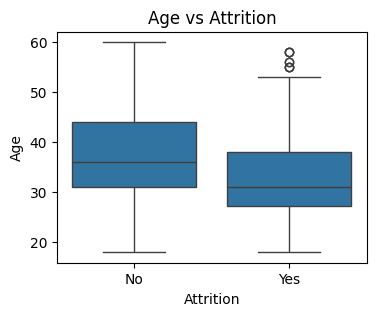

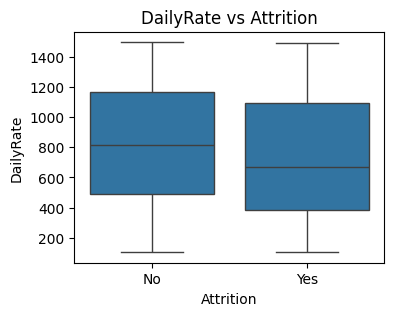

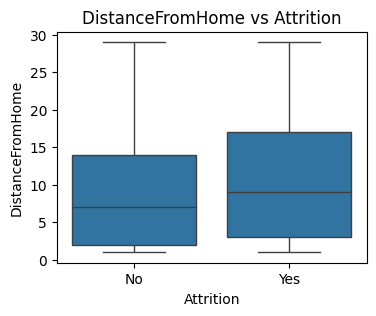

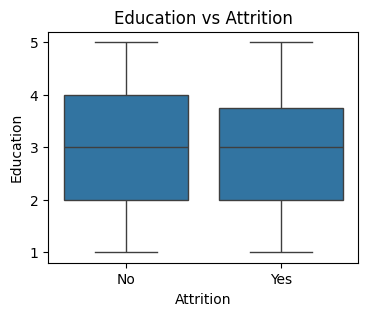

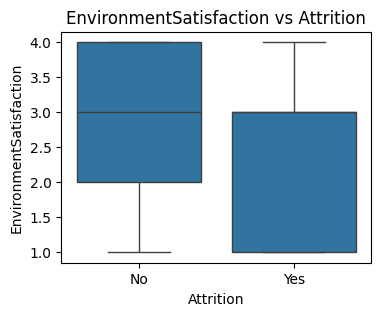

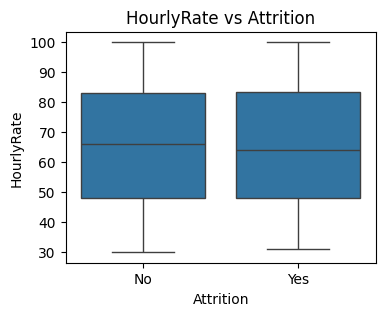

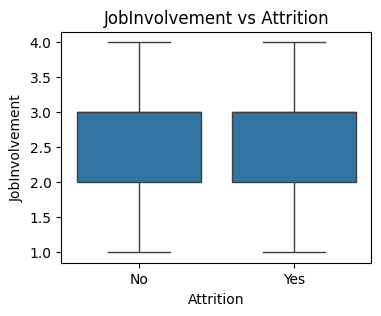

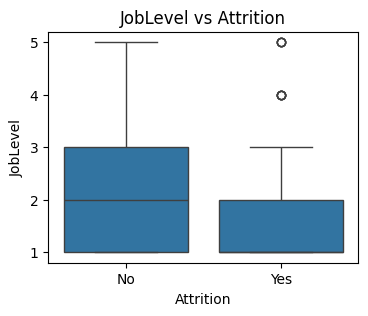

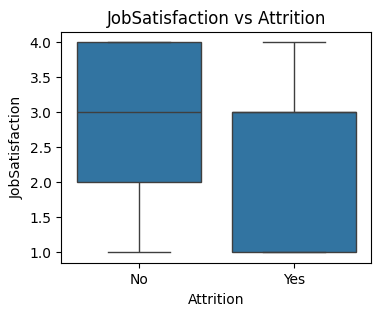

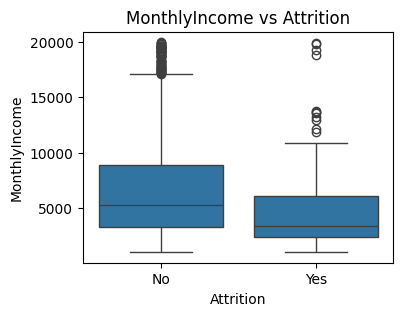

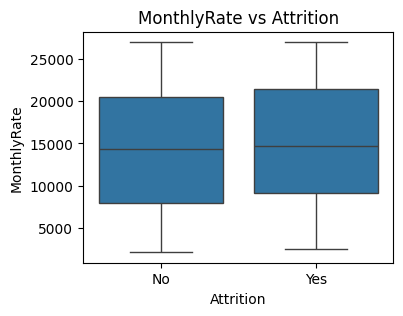

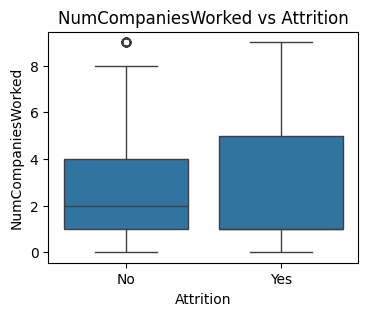

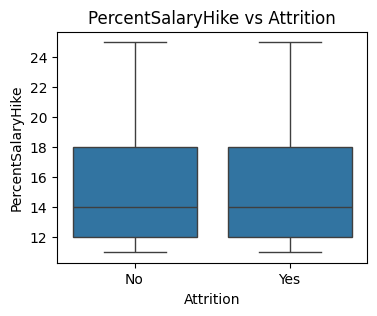

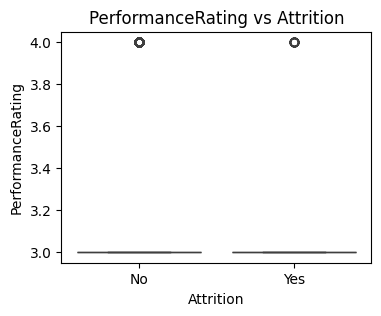

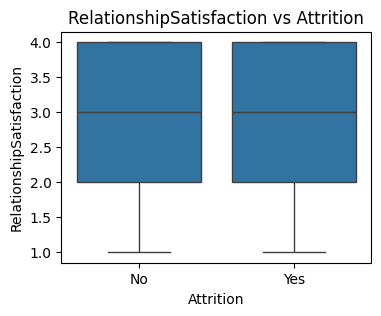

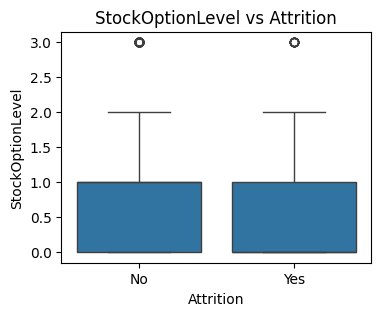

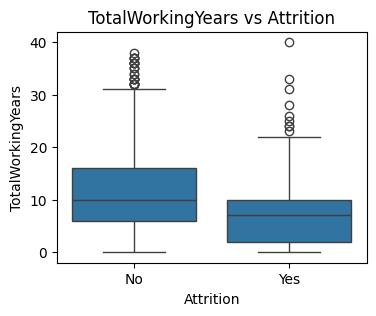

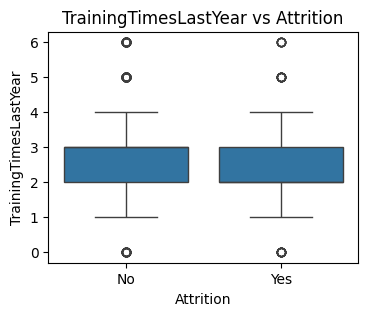

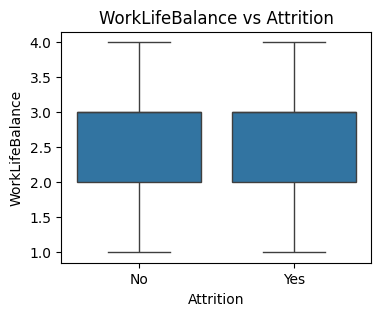

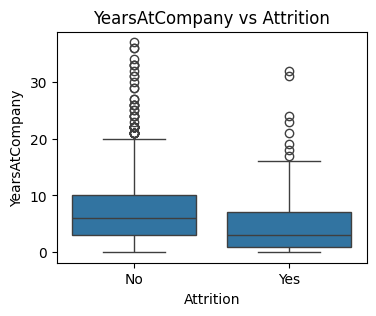

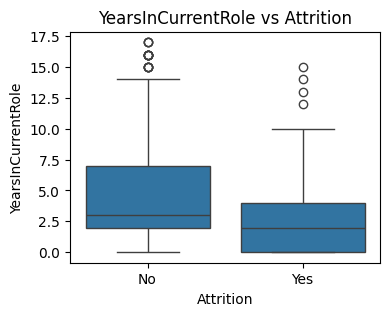

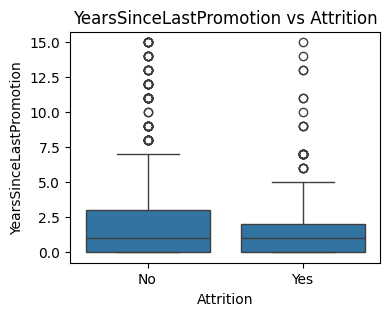

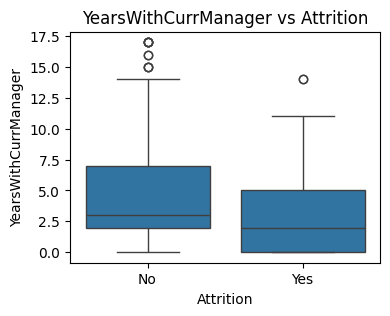

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt

for col in numeric_cols:
    plt.figure(figsize=(4, 3))
    sns.boxplot(x="Attrition", y=col, data=train_df)
    plt.title(f"{col} vs Attrition")
    plt.show()


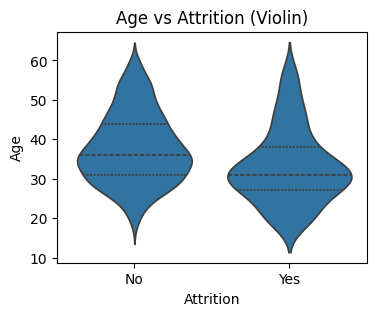

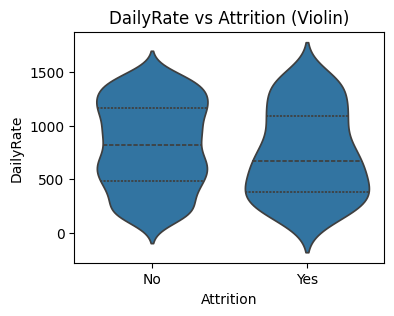

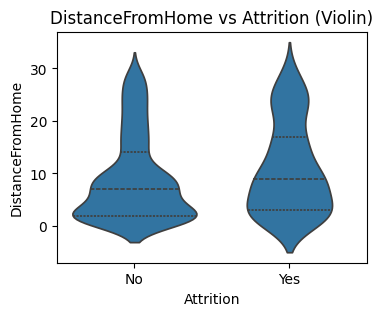

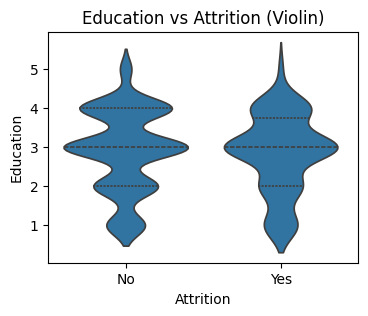

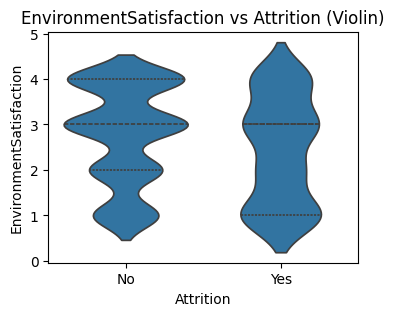

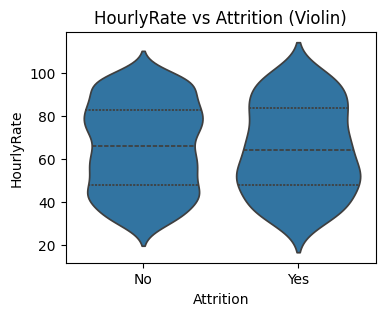

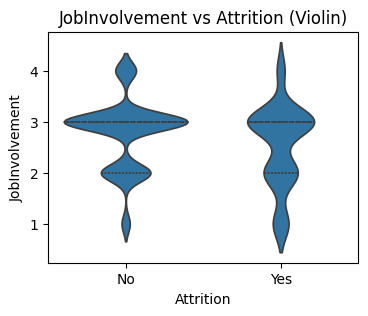

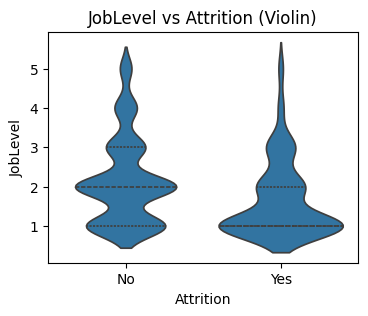

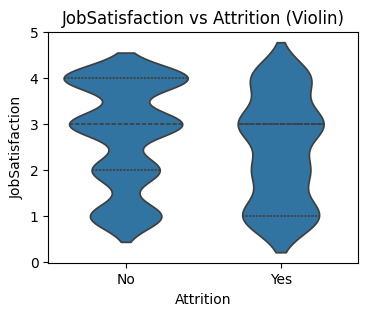

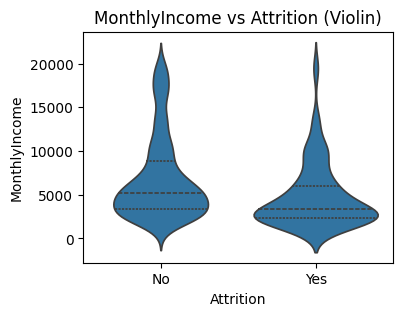

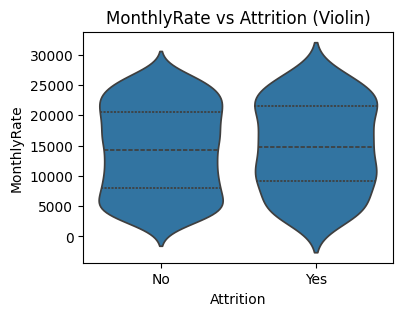

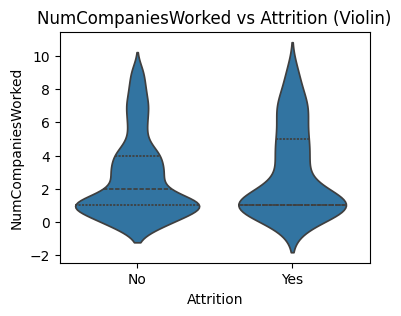

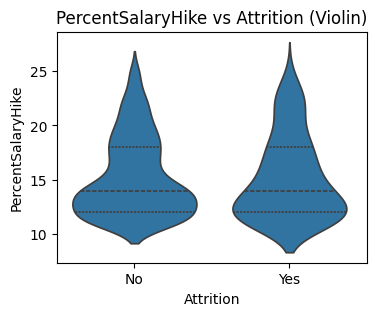

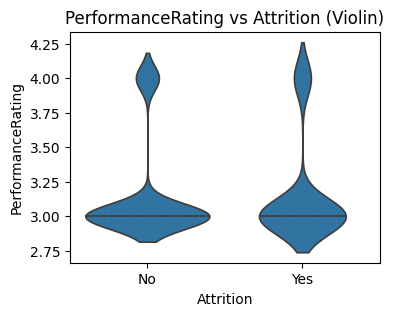

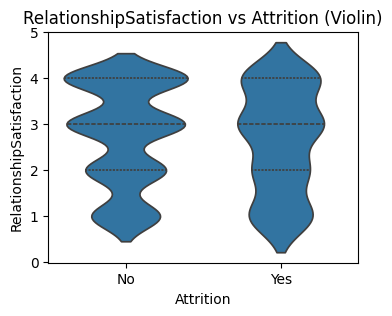

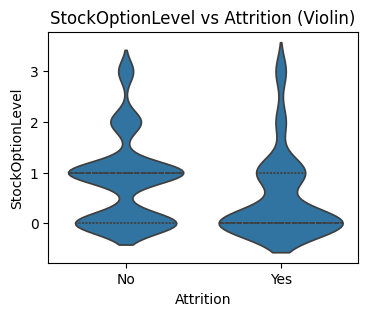

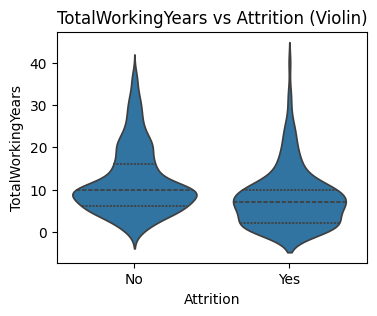

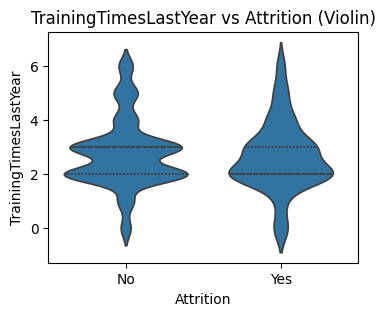

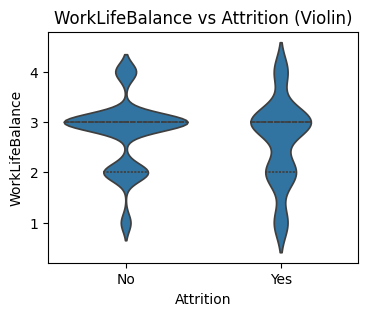

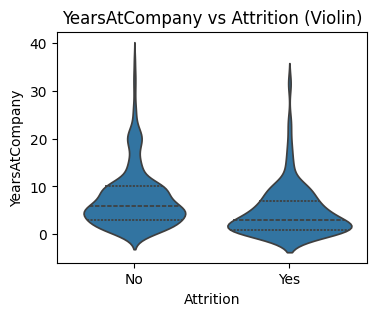

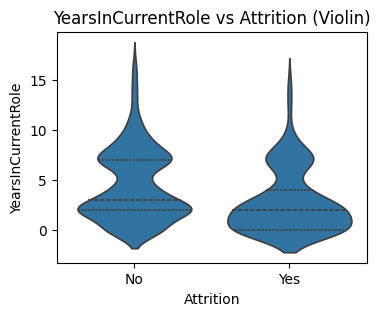

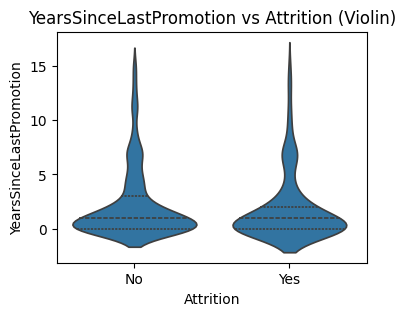

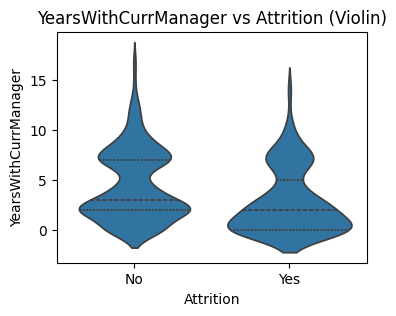

In [16]:
for col in numeric_cols:
    plt.figure(figsize=(4, 3))
    sns.violinplot(x="Attrition", y=col, data=train_df, inner="quartile")
    plt.title(f"{col} vs Attrition (Violin)")
    plt.show()


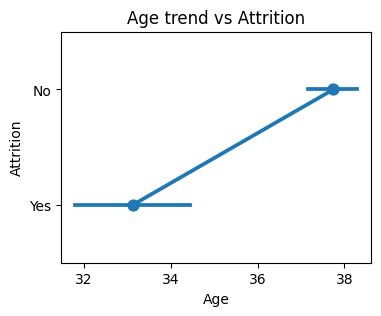

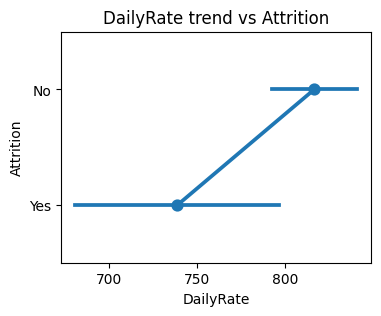

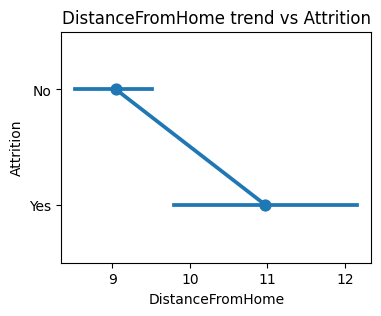

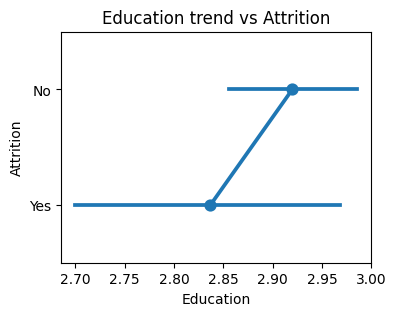

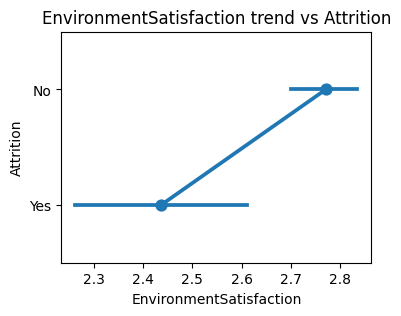

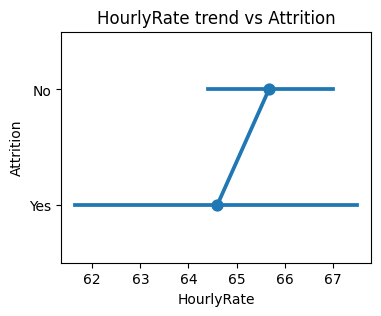

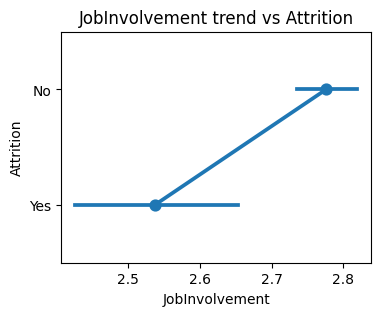

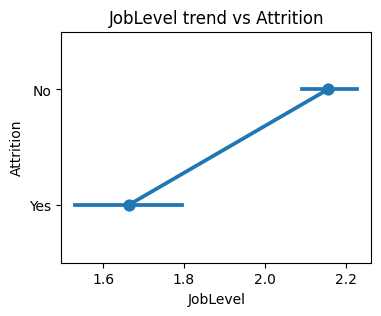

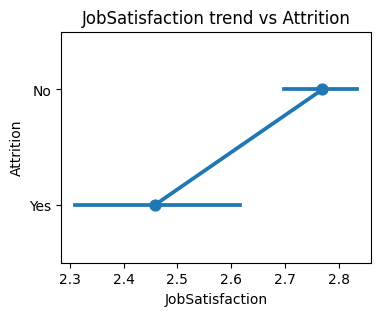

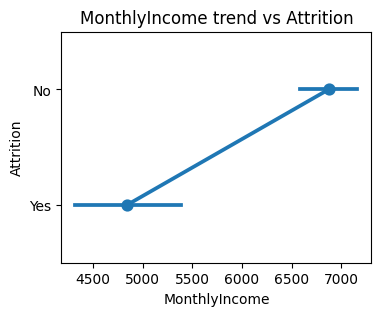

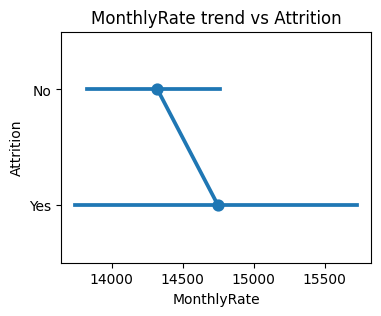

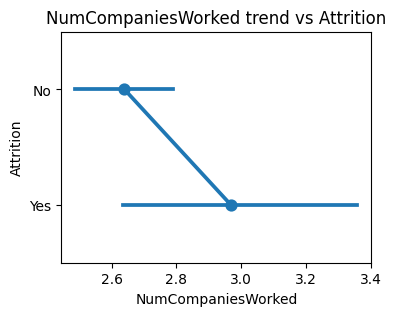

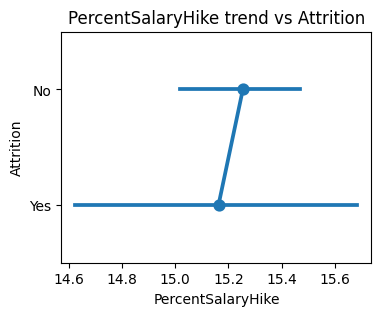

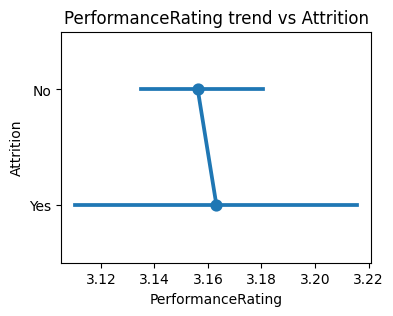

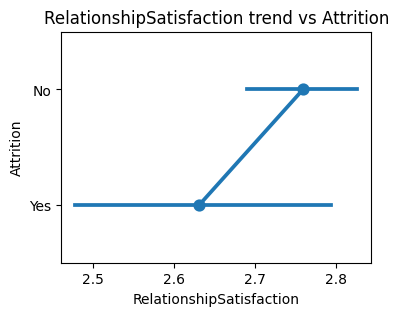

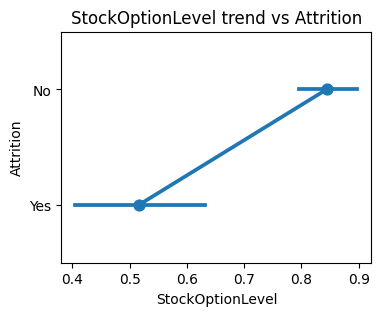

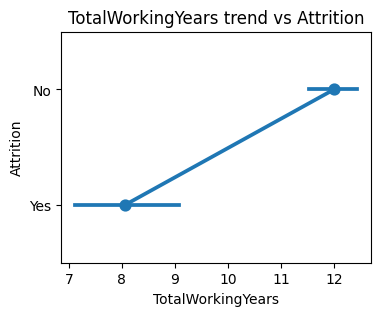

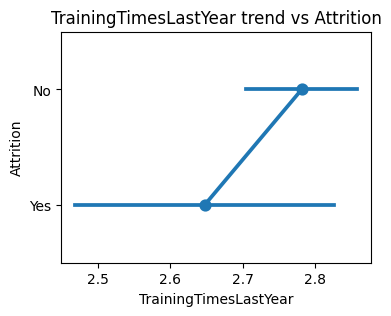

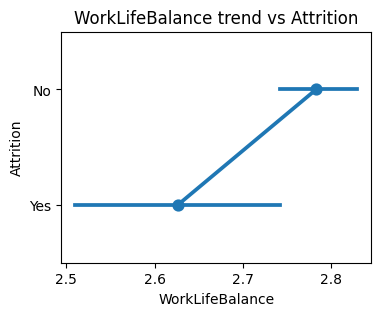

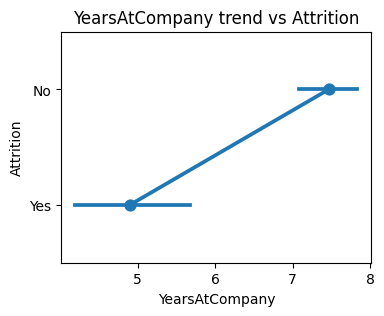

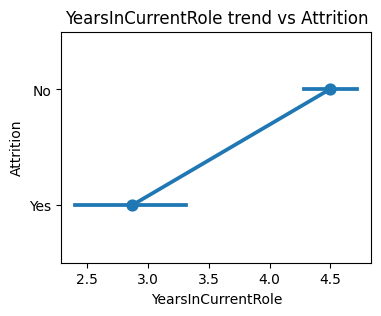

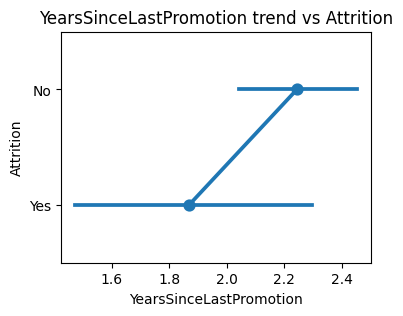

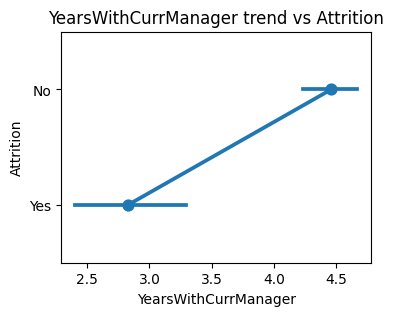

In [17]:
for col in numeric_cols:
    plt.figure(figsize=(4, 3))
    sns.pointplot(x=col, y="Attrition", data=train_df)
    plt.title(f"{col} trend vs Attrition")
    plt.show()


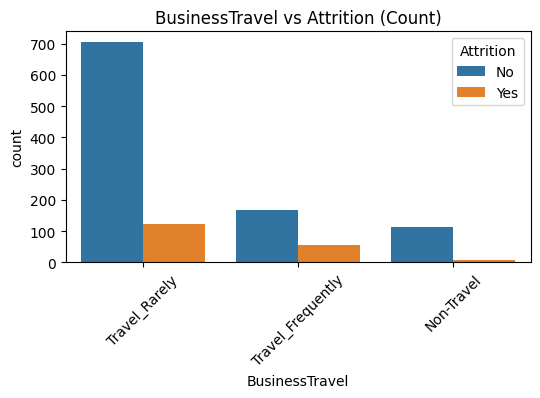

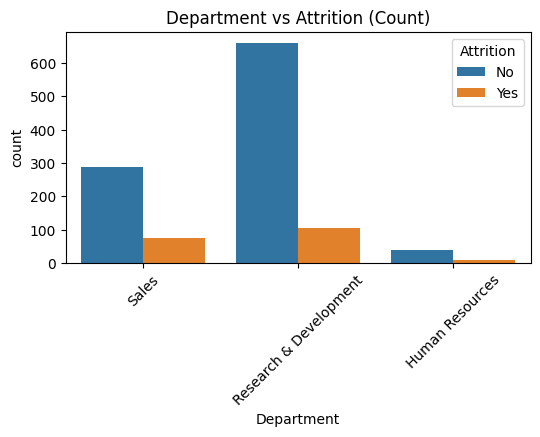

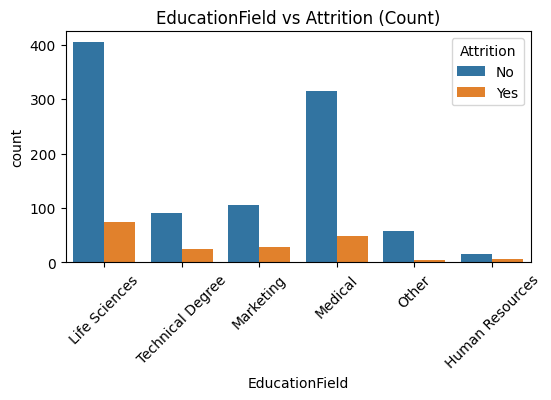

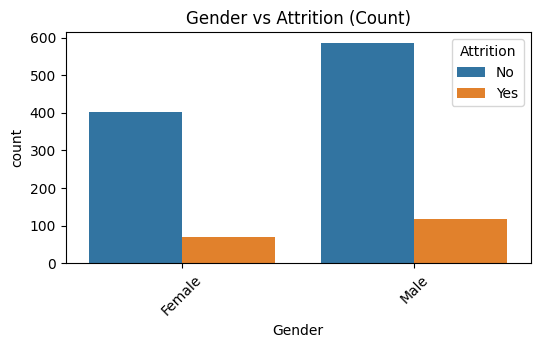

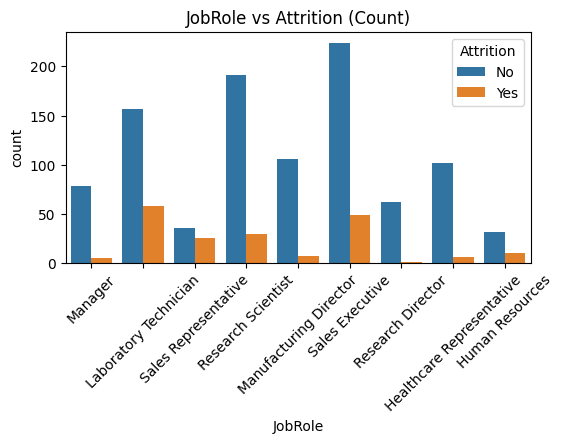

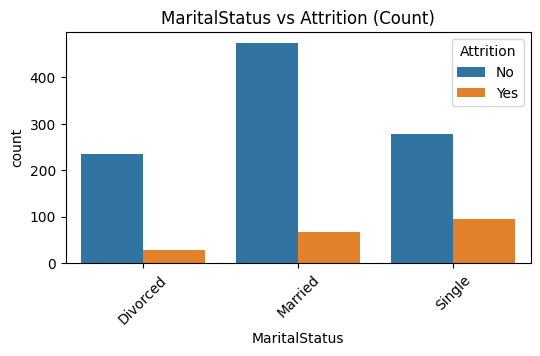

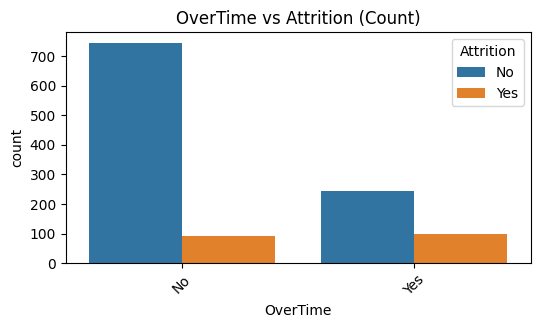

In [18]:
for col in categorical_cols:
    plt.figure(figsize=(6, 3))
    sns.countplot(x=col, hue="Attrition", data=train_df)
    plt.xticks(rotation=45)
    plt.title(f"{col} vs Attrition (Count)")
    plt.show()


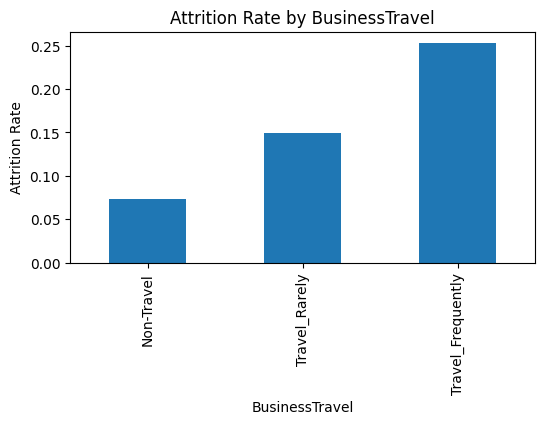

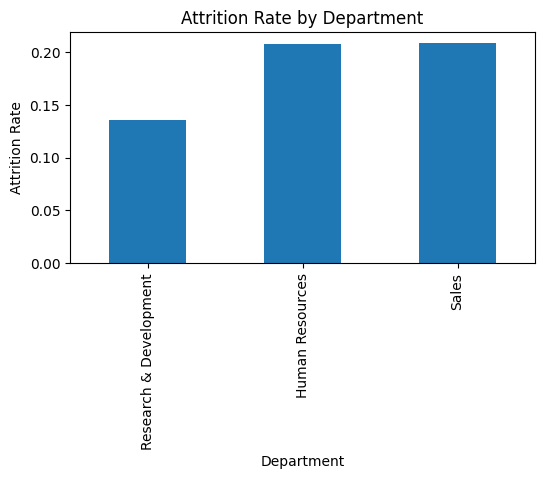

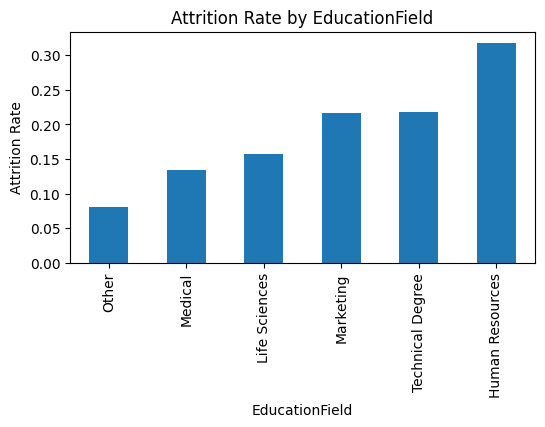

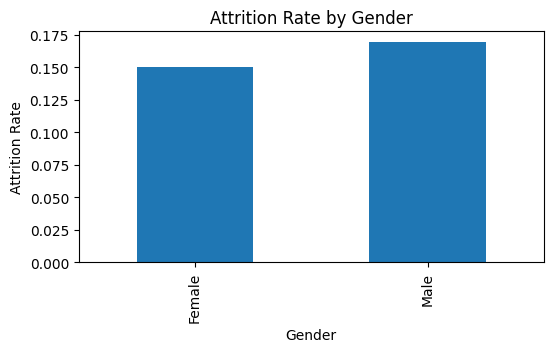

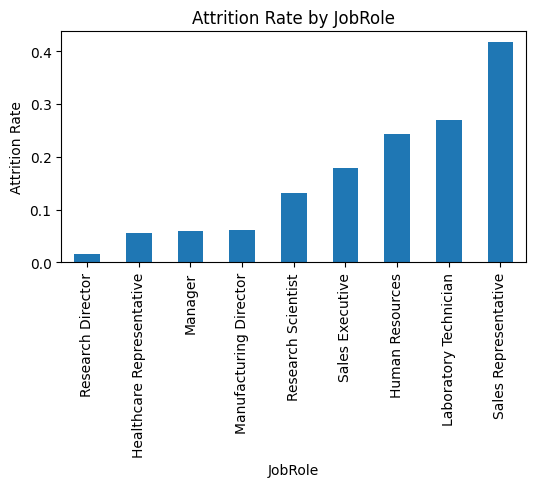

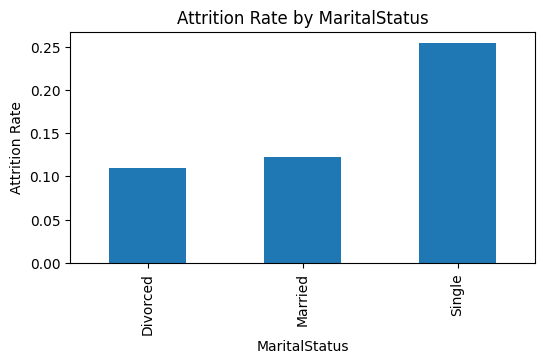

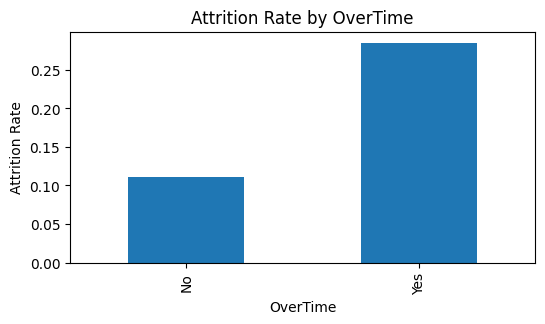

In [19]:
import matplotlib.pyplot as plt

# Attrition must be numeric for rate calculation
train_df["Attrition_num"] = train_df["Attrition"].map({"No": 0, "Yes": 1})

for col in categorical_cols:
    rate = train_df.groupby(col)["Attrition_num"].mean().sort_values()
    rate.plot(kind="bar", figsize=(6, 3))
    plt.ylabel("Attrition Rate")
    plt.title(f"Attrition Rate by {col}")
    plt.show()


In [20]:
# Train-only dataframe
train_df = X_train.copy()
train_df["Attrition"] = y_train

# Numeric version ONLY for analysis
train_df["Attrition_num"] = train_df["Attrition"].map({"No": 0, "Yes": 1})


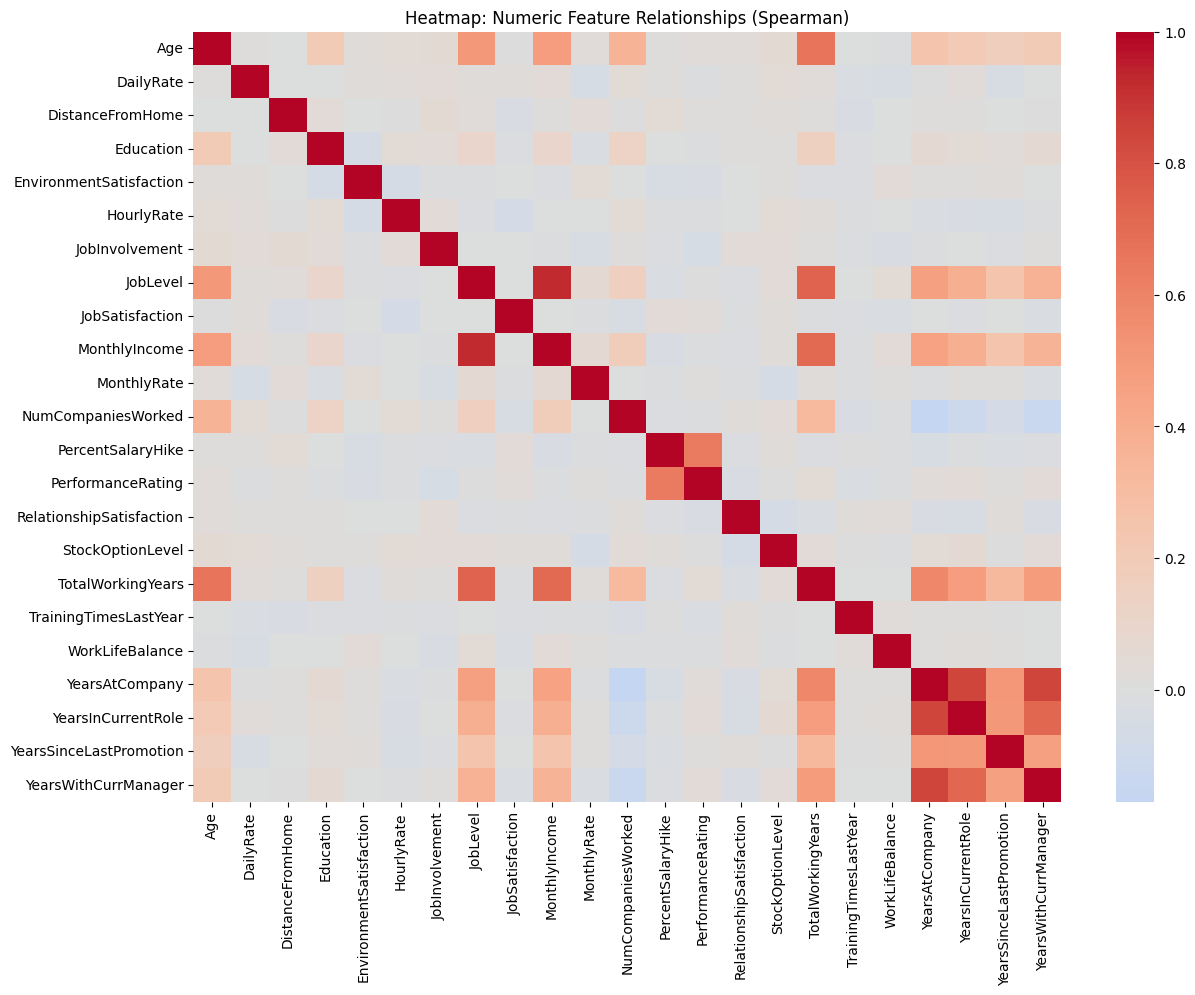

In [21]:
import seaborn as sns
import matplotlib.pyplot as plt

numeric_cols = X_train.select_dtypes(include=["int64", "float64"]).columns

corr_matrix = train_df[numeric_cols].corr(method="spearman")

plt.figure(figsize=(14, 10))
sns.heatmap(corr_matrix, cmap="coolwarm", center=0)
plt.title("Heatmap: Numeric Feature Relationships (Spearman)")
plt.show()


In [22]:
# -----------------------------
# Columns decided to be dropped
# (based ONLY on train EDA)
# -----------------------------

drop_cols = [
    "HourlyRate",
    "MonthlyRate",
    "PercentSalaryHike",
    "TrainingTimesLastYear",
    "PerformanceRating",
    "YearsSinceLastPromotion"
]

# -----------------------------
# Drop from TRAIN
# -----------------------------

X_train = X_train.drop(columns=drop_cols)

# -----------------------------
# Drop from TEST
# -----------------------------

X_test = X_test.drop(columns=drop_cols)

# -----------------------------
# Sanity check
# -----------------------------

print("Train shape after dropping:", X_train.shape)
print("Test shape after dropping :", X_test.shape)


Train shape after dropping: (1176, 24)
Test shape after dropping : (294, 24)


In [23]:
import pandas as pd
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder

# -----------------------------
# 1️⃣ Identify column types
# -----------------------------

numeric_cols = X_train.select_dtypes(include=["int64", "float64"]).columns.tolist()
categorical_cols = X_train.select_dtypes(include=["object"]).columns.tolist()

# Ordinal columns are already numeric → included in numeric_cols
# We DO NOT encode them

# -----------------------------
# 2️⃣ NUMERIC → Median Imputation
# -----------------------------

num_imputer = SimpleImputer(strategy="median")

X_train_num = num_imputer.fit_transform(X_train[numeric_cols])   # FIT on TRAIN
X_test_num  = num_imputer.transform(X_test[numeric_cols])        # TRANSFORM TEST

X_train_num = pd.DataFrame(X_train_num, columns=numeric_cols, index=X_train.index)
X_test_num  = pd.DataFrame(X_test_num, columns=numeric_cols, index=X_test.index)

# -----------------------------
# 3️⃣ CATEGORICAL → One-Hot Encoding
# -----------------------------

cat_imputer = SimpleImputer(strategy="most_frequent")

X_train_cat = cat_imputer.fit_transform(X_train[categorical_cols])  # FIT on TRAIN
X_test_cat  = cat_imputer.transform(X_test[categorical_cols])       # TRANSFORM TEST

ohe = OneHotEncoder(handle_unknown="ignore", sparse_output=False)

X_train_cat_ohe = ohe.fit_transform(X_train_cat)   # FIT on TRAIN
X_test_cat_ohe  = ohe.transform(X_test_cat)        # TRANSFORM TEST

cat_feature_names = ohe.get_feature_names_out(categorical_cols)

X_train_cat_ohe = pd.DataFrame(
    X_train_cat_ohe,
    columns=cat_feature_names,
    index=X_train.index
)

X_test_cat_ohe = pd.DataFrame(
    X_test_cat_ohe,
    columns=cat_feature_names,
    index=X_test.index
)

# -----------------------------
# 4️⃣ Combine NUMERIC + CATEGORICAL
# -----------------------------

X_train_final = pd.concat([X_train_num, X_train_cat_ohe], axis=1)
X_test_final  = pd.concat([X_test_num, X_test_cat_ohe], axis=1)

# -----------------------------
# Final sanity check
# -----------------------------

print("Final Train shape:", X_train_final.shape)
print("Final Test shape :", X_test_final.shape)


Final Train shape: (1176, 45)
Final Test shape : (294, 45)


In [24]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score

# -----------------------------
# Standardization
# -----------------------------

scaler_std = StandardScaler()

X_train_std = scaler_std.fit_transform(X_train_final)   # FIT on TRAIN
X_test_std  = scaler_std.transform(X_test_final)        # TRANSFORM TEST

# Logistic Regression
log_std = LogisticRegression(max_iter=1000, random_state=42)

log_std.fit(X_train_std, y_train)

std_probs = log_std.predict_proba(X_test_std)[:, 1]
roc_std = roc_auc_score(y_test, std_probs)

print("ROC-AUC (Standardization):", round(roc_std, 4))


ROC-AUC (Standardization): 0.786


In [25]:
from sklearn.preprocessing import MinMaxScaler

# -----------------------------
# Normalization
# -----------------------------

scaler_mm = MinMaxScaler()

X_train_mm = scaler_mm.fit_transform(X_train_final)   # FIT on TRAIN
X_test_mm  = scaler_mm.transform(X_test_final)        # TRANSFORM TEST

# Logistic Regression
log_mm = LogisticRegression(max_iter=1000, random_state=42)

log_mm.fit(X_train_mm, y_train)

mm_probs = log_mm.predict_proba(X_test_mm)[:, 1]
roc_mm = roc_auc_score(y_test, mm_probs)

print("ROC-AUC (Normalization):", round(roc_mm, 4))


ROC-AUC (Normalization): 0.7986


In [26]:
# ================================
# Log Transformation Experiment
# ================================

import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score

# 1️⃣ Copy data (do NOT overwrite baseline)
X_train_log = X_train_final.copy()
X_test_log  = X_test_final.copy()

# 2️⃣ Skewed numeric columns (based on EDA)
skewed_cols = [
    "MonthlyIncome",
    "TotalWorkingYears",
    "YearsAtCompany",
    "YearsInCurrentRole",
    "YearsWithCurrManager",
    "DistanceFromHome"
]

# 3️⃣ Apply log1p transformation (safe, no leakage)
for col in skewed_cols:
    X_train_log[col] = np.log1p(X_train_log[col])
    X_test_log[col]  = np.log1p(X_test_log[col])

# 4️⃣ Train baseline Logistic Regression (NO scaling)
log_model = LogisticRegression(
    max_iter=1000,
    random_state=42
)

log_model.fit(X_train_log, y_train)

# 5️⃣ ROC-AUC evaluation
log_probs = log_model.predict_proba(X_test_log)[:, 1]
roc_log = roc_auc_score(y_test, log_probs)

print("ROC-AUC (Log-transformed features):", round(roc_log, 4))


ROC-AUC (Log-transformed features): 0.7845


C:\Users\goutham\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\linear_model\_logistic.py:473: ConvergenceWarning: lbfgs failed to converge after 1000 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=1000).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [27]:
# =====================================================
# Feature-wise Transformation Evaluation (ROC-AUC)
# =====================================================

import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score

# Baseline ROC-AUC (no transformation)
base_model = LogisticRegression(max_iter=1000, random_state=42)
base_model.fit(X_train_final, y_train)
base_probs = base_model.predict_proba(X_test_final)[:, 1]
base_auc = roc_auc_score(y_test, base_probs)

print(f"\nBaseline (No Transformation) ROC-AUC : {base_auc:.4f}\n")

# Skewed features to test
skewed_features = [
    "MonthlyIncome",
    "TotalWorkingYears",
    "YearsAtCompany",
    "YearsInCurrentRole",
    "YearsWithCurrManager",
    "DistanceFromHome"
]

transforms = {
    "log1p": np.log1p,
    "sqrt": np.sqrt
}

results = []

for feature in skewed_features:
    for t_name, t_func in transforms.items():
        
        # Copy data
        X_train_tmp = X_train_final.copy()
        X_test_tmp  = X_test_final.copy()
        
        # Apply transformation ONLY to one feature
        X_train_tmp[feature] = t_func(X_train_tmp[feature])
        X_test_tmp[feature]  = t_func(X_test_tmp[feature])
        
        # Train model
        model = LogisticRegression(max_iter=1000, random_state=42)
        model.fit(X_train_tmp, y_train)
        
        probs = model.predict_proba(X_test_tmp)[:, 1]
        auc = roc_auc_score(y_test, probs)
        
        results.append((feature, t_name, auc))

# Print results
print("Feature-wise Transformation Results:\n")
for feature, t_name, auc in results:
    diff = auc - base_auc
    sign = "+" if diff >= 0 else ""
    print(f"{feature:<22} | {t_name:<6} | ROC-AUC: {auc:.4f} ({sign}{diff:.4f})")


C:\Users\goutham\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\linear_model\_logistic.py:473: ConvergenceWarning: lbfgs failed to converge after 1000 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=1000).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(



Baseline (No Transformation) ROC-AUC : 0.8037



C:\Users\goutham\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\linear_model\_logistic.py:473: ConvergenceWarning: lbfgs failed to converge after 1000 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=1000).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\goutham\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\linear_model\_logistic.py:473: ConvergenceWarning: lbfgs failed to converge after 1000 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=1000).
You might also want to scale the data as shown in:
    https

Feature-wise Transformation Results:

MonthlyIncome          | log1p  | ROC-AUC: 0.7911 (-0.0126)
MonthlyIncome          | sqrt   | ROC-AUC: 0.7977 (-0.0059)
TotalWorkingYears      | log1p  | ROC-AUC: 0.8027 (-0.0009)
TotalWorkingYears      | sqrt   | ROC-AUC: 0.7848 (-0.0189)
YearsAtCompany         | log1p  | ROC-AUC: 0.8006 (-0.0031)
YearsAtCompany         | sqrt   | ROC-AUC: 0.7914 (-0.0123)
YearsInCurrentRole     | log1p  | ROC-AUC: 0.7933 (-0.0103)
YearsInCurrentRole     | sqrt   | ROC-AUC: 0.7934 (-0.0103)
YearsWithCurrManager   | log1p  | ROC-AUC: 0.7903 (-0.0134)
YearsWithCurrManager   | sqrt   | ROC-AUC: 0.7963 (-0.0074)
DistanceFromHome       | log1p  | ROC-AUC: 0.7983 (-0.0053)
DistanceFromHome       | sqrt   | ROC-AUC: 0.7958 (-0.0078)


C:\Users\goutham\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\linear_model\_logistic.py:473: ConvergenceWarning: lbfgs failed to converge after 1000 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=1000).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [28]:
# =====================================================
# Linear Model Class Comparison (ROC-AUC)
# =====================================================

from sklearn.linear_model import LogisticRegression, SGDClassifier, RidgeClassifier
from sklearn.svm import LinearSVC
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.metrics import roc_auc_score
import numpy as np

results = {}

# ---------- 1️⃣ Logistic Regression (NO scaling) ----------
log_reg = LogisticRegression(max_iter=1000, random_state=42)
log_reg.fit(X_train_final, y_train)
probs = log_reg.predict_proba(X_test_final)[:, 1]
results["Logistic (no scaling)"] = roc_auc_score(y_test, probs)


# ---------- 2️⃣ Logistic Regression (WITH scaling) ----------
pipe_log_std = make_pipeline(
    StandardScaler(),
    LogisticRegression(max_iter=1000, random_state=42)
)
pipe_log_std.fit(X_train_final, y_train)
probs = pipe_log_std.predict_proba(X_test_final)[:, 1]
results["Logistic (scaled)"] = roc_auc_score(y_test, probs)


# ---------- 3️⃣ SGDClassifier (log loss) — scaling REQUIRED ----------
pipe_sgd = make_pipeline(
    StandardScaler(),
    SGDClassifier(loss="log_loss", max_iter=2000, random_state=42)
)
pipe_sgd.fit(X_train_final, y_train)
probs = pipe_sgd.predict_proba(X_test_final)[:, 1]
results["SGDClassifier (scaled)"] = roc_auc_score(y_test, probs)


# ---------- 4️⃣ Linear SVM — scaling REQUIRED ----------
pipe_svm = make_pipeline(
    StandardScaler(),
    LinearSVC(random_state=42)
)
pipe_svm.fit(X_train_final, y_train)

# LinearSVC has no predict_proba → use decision_function
scores = pipe_svm.decision_function(X_test_final)
results["Linear SVM (scaled)"] = roc_auc_score(y_test, scores)


# ---------- 5️⃣ RidgeClassifier — scaling recommended ----------
pipe_ridge = make_pipeline(
    StandardScaler(),
    RidgeClassifier(random_state=42)
)
pipe_ridge.fit(X_train_final, y_train)
scores = pipe_ridge.decision_function(X_test_final)
results["RidgeClassifier (scaled)"] = roc_auc_score(y_test, scores)


# ---------- Show results ----------
print("\nLinear Model Class ROC-AUC Comparison:\n")
for model, auc in results.items():
    print(f"{model:<30} : {auc:.4f}")



Linear Model Class ROC-AUC Comparison:

Logistic (no scaling)          : 0.8037
Logistic (scaled)              : 0.7860
SGDClassifier (scaled)         : 0.6817
Linear SVM (scaled)            : 0.7876
RidgeClassifier (scaled)       : 0.7844


C:\Users\goutham\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\linear_model\_logistic.py:473: ConvergenceWarning: lbfgs failed to converge after 1000 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=1000).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [29]:
# =====================================================
# Linear Model Class Comparison (ROC-AUC)
# =====================================================

from sklearn.linear_model import LogisticRegression, SGDClassifier, RidgeClassifier
from sklearn.svm import LinearSVC
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.metrics import roc_auc_score
import numpy as np

results = {}

# ---------- 1️⃣ Logistic Regression (NO scaling) ----------
log_reg = LogisticRegression(max_iter=1000, random_state=42)
log_reg.fit(X_train_final, y_train)
probs = log_reg.predict_proba(X_test_final)[:, 1]
results["Logistic (no scaling)"] = roc_auc_score(y_test, probs)


# ---------- 2️⃣ Logistic Regression (WITH scaling) ----------
pipe_log_std = make_pipeline(
    StandardScaler(),
    LogisticRegression(max_iter=1000, random_state=42)
)
pipe_log_std.fit(X_train_final, y_train)
probs = pipe_log_std.predict_proba(X_test_final)[:, 1]
results["Logistic (scaled)"] = roc_auc_score(y_test, probs)


# ---------- 3️⃣ SGDClassifier (log loss) — scaling REQUIRED ----------
pipe_sgd = make_pipeline(
    StandardScaler(),
    SGDClassifier(loss="log_loss", max_iter=2000, random_state=42)
)
pipe_sgd.fit(X_train_final, y_train)
probs = pipe_sgd.predict_proba(X_test_final)[:, 1]
results["SGDClassifier (scaled)"] = roc_auc_score(y_test, probs)


# ---------- 4️⃣ Linear SVM — scaling REQUIRED ----------
pipe_svm = make_pipeline(
    StandardScaler(),
    LinearSVC(random_state=42)
)
pipe_svm.fit(X_train_final, y_train)

# LinearSVC has no predict_proba → use decision_function
scores = pipe_svm.decision_function(X_test_final)
results["Linear SVM (scaled)"] = roc_auc_score(y_test, scores)


# ---------- 5️⃣ RidgeClassifier — scaling recommended ----------
pipe_ridge = make_pipeline(
    StandardScaler(),
    RidgeClassifier(random_state=42)
)
pipe_ridge.fit(X_train_final, y_train)
scores = pipe_ridge.decision_function(X_test_final)
results["RidgeClassifier (scaled)"] = roc_auc_score(y_test, scores)


# ---------- Show results ----------
print("\nLinear Model Class ROC-AUC Comparison:\n")
for model, auc in results.items():
    print(f"{model:<30} : {auc:.4f}")



Linear Model Class ROC-AUC Comparison:

Logistic (no scaling)          : 0.8037
Logistic (scaled)              : 0.7860
SGDClassifier (scaled)         : 0.6817
Linear SVM (scaled)            : 0.7876
RidgeClassifier (scaled)       : 0.7844


C:\Users\goutham\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\linear_model\_logistic.py:473: ConvergenceWarning: lbfgs failed to converge after 1000 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=1000).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [30]:
# =====================================================
# Linear Models WITHOUT Scaling (ROC-AUC Comparison)
# =====================================================

from sklearn.linear_model import LogisticRegression, SGDClassifier, RidgeClassifier
from sklearn.svm import LinearSVC
from sklearn.metrics import roc_auc_score

results_no_scale = {}

# ---------- 1️⃣ Logistic Regression (no scaling) ----------
log_reg = LogisticRegression(max_iter=1000, random_state=42)
log_reg.fit(X_train_final, y_train)
probs = log_reg.predict_proba(X_test_final)[:, 1]
results_no_scale["Logistic (no scaling)"] = roc_auc_score(y_test, probs)


# ---------- 2️⃣ SGDClassifier (no scaling) ----------
sgd = SGDClassifier(loss="log_loss", max_iter=2000, random_state=42)
sgd.fit(X_train_final, y_train)
probs = sgd.predict_proba(X_test_final)[:, 1]
results_no_scale["SGDClassifier (no scaling)"] = roc_auc_score(y_test, probs)


# ---------- 3️⃣ Linear SVM (no scaling) ----------
svm = LinearSVC(random_state=42)
svm.fit(X_train_final, y_train)
scores = svm.decision_function(X_test_final)
results_no_scale["Linear SVM (no scaling)"] = roc_auc_score(y_test, scores)


# ---------- 4️⃣ RidgeClassifier (no scaling) ----------
ridge = RidgeClassifier(random_state=42)
ridge.fit(X_train_final, y_train)
scores = ridge.decision_function(X_test_final)
results_no_scale["RidgeClassifier (no scaling)"] = roc_auc_score(y_test, scores)


# ---------- Show results ----------
print("\nLinear Models WITHOUT Scaling (ROC-AUC):\n")
for model, auc in results_no_scale.items():
    print(f"{model:<30} : {auc:.4f}")



Linear Models WITHOUT Scaling (ROC-AUC):

Logistic (no scaling)          : 0.8037
SGDClassifier (no scaling)     : 0.5000
Linear SVM (no scaling)        : 0.8056
RidgeClassifier (no scaling)   : 0.7862


C:\Users\goutham\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\linear_model\_logistic.py:473: ConvergenceWarning: lbfgs failed to converge after 1000 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=1000).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [31]:
# Encode target variable (RUN THIS CELL FIRST)

y_train_num = y_train.map({"No": 0, "Yes": 1})
y_test_num  = y_test.map({"No": 0, "Yes": 1})

print(y_train_num.value_counts())
print(y_test_num.value_counts())


Attrition
0    986
1    190
Name: count, dtype: int64
Attrition
0    247
1     47
Name: count, dtype: int64


In [32]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.metrics import roc_auc_score, recall_score
import pandas as pd

results = []

def evaluate(model, X_test, y_test, model_name, weight_name, use_proba=True):
    if use_proba:
        scores = model.predict_proba(X_test)[:, 1]
    else:
        scores = model.decision_function(X_test)
    
    roc = roc_auc_score(y_test, scores)
    preds = (scores >= 0.5).astype(int)
    recall = recall_score(y_test, preds)
    
    results.append({
        "Model": model_name,
        "Class_Weight": weight_name,
        "ROC_AUC": roc,
        "Recall_Yes": recall
    })

class_weights = {
    "None": None,
    "Balanced": "balanced",
    "Yes=2x": {0: 1, 1: 2},
    "Yes=3x": {0: 1, 1: 3}
}

# Logistic Regression
for name, cw in class_weights.items():
    lr = LogisticRegression(
        max_iter=2000,
        class_weight=cw,
        random_state=42
    )
    lr.fit(X_train_final, y_train_num)
    evaluate(lr, X_test_final, y_test_num, "Logistic", name, use_proba=True)

# Linear SVM
for name, cw in class_weights.items():
    svm = LinearSVC(
        class_weight=cw,
        random_state=42
    )
    svm.fit(X_train_final, y_train_num)
    evaluate(svm, X_test_final, y_test_num, "Linear SVM", name, use_proba=False)

results_df = pd.DataFrame(results)
results_df


C:\Users\goutham\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\linear_model\_logistic.py:473: ConvergenceWarning: lbfgs failed to converge after 2000 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=2000).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\goutham\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\linear_model\_logistic.py:473: ConvergenceWarning: lbfgs failed to converge after 2000 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=2000).
You might also want to scale the data as shown in:
    https

,Model,Class_Weight,ROC_AUC,Recall_Yes
0,Logistic,None,0.794125,0.297872
1,Logistic,Balanced,0.773624,0.638298
2,Logistic,Yes=2x,0.782841,0.446809
3,Logistic,Yes=3x,0.776983,0.468085
4,Linear SVM,None,0.805582,0.042553
5,Linear SVM,Balanced,0.778792,0.340426
6,Linear SVM,Yes=2x,0.801016,0.191489
7,Linear SVM,Yes=3x,0.783013,0.234043


In [33]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score, recall_score
import pandas as pd

C_values = [0.5, 1.0,1.9,2.0,2.1,2.2,3.4,3.5, 5.0]

results = []

for C in C_values:
    lr = LogisticRegression(
        C=C,
        class_weight="balanced",
        max_iter=3000,
        random_state=42
    )
    lr.fit(X_train_final, y_train_num)
    
    probs = lr.predict_proba(X_test_final)[:, 1]
    preds = (probs >= 0.5).astype(int)
    
    results.append({
        "C": C,
        "ROC_AUC": roc_auc_score(y_test_num, probs),
        "Recall_Yes": recall_score(y_test_num, preds)
    })

pd.DataFrame(results)


C:\Users\goutham\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\linear_model\_logistic.py:473: ConvergenceWarning: lbfgs failed to converge after 3000 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=3000).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\goutham\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\linear_model\_logistic.py:473: ConvergenceWarning: lbfgs failed to converge after 3000 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=3000).
You might also want to scale the data as shown in:
    https

,C,ROC_AUC,Recall_Yes
0,0.5,0.787579,0.659574
1,1.0,0.788182,0.659574
2,1.9,0.779051,0.680851
3,2.0,0.786373,0.680851
4,2.1,0.777414,0.659574
5,2.2,0.789043,0.617021
6,3.4,0.782410,0.617021
7,3.5,0.784219,0.680851
8,5.0,0.773624,0.680851


In [34]:
from sklearn.metrics import precision_score, recall_score

best_C = 2.0  # <-- change this based on your C-tuning result

lr = LogisticRegression(
    C=best_C,
    class_weight="balanced",
    max_iter=3000,
    random_state=42
)

lr.fit(X_train_final, y_train_num)
probs = lr.predict_proba(X_test_final)[:, 1]

thresholds = [0.5, 0.4, 0.3, 0.2]
results = []

for t in thresholds:
    preds = (probs >= t).astype(int)
    
    results.append({
        "Threshold": t,
        "Recall_Yes": recall_score(y_test_num, preds),
        "Precision_Yes": precision_score(y_test_num, preds)
    })

pd.DataFrame(results)


C:\Users\goutham\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\linear_model\_logistic.py:473: ConvergenceWarning: lbfgs failed to converge after 3000 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=3000).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


,Threshold,Recall_Yes,Precision_Yes
0,0.5,0.680851,0.367816
1,0.4,0.723404,0.309091
2,0.3,0.829787,0.268966
3,0.2,0.893617,0.227027


In [35]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report
import pandas as pd

# -----------------------------
# Train FINAL model (LOCKED)
# -----------------------------

final_model = LogisticRegression(
    C=2.0,
    class_weight="balanced",
    max_iter=3000,
    random_state=42
)

final_model.fit(X_train_final, y_train_num)

# -----------------------------
# Predict probabilities
# -----------------------------

probs = final_model.predict_proba(X_test_final)[:, 1]

# -----------------------------
# Apply FINAL threshold
# -----------------------------

threshold = 0.3
y_pred_final = (probs >= threshold).astype(int)

# -----------------------------
# Confusion Matrix
# -----------------------------

cm = confusion_matrix(y_test_num, y_pred_final)

cm_df = pd.DataFrame(
    cm,
    index=["Actual_No", "Actual_Yes"],
    columns=["Pred_No", "Pred_Yes"]
)

print("Confusion Matrix (Threshold = 0.3)\n")
display(cm_df)

# -----------------------------
# Classification Report
# -----------------------------

print("\nClassification Report:\n")
print(classification_report(y_test_num, y_pred_final, target_names=["No", "Yes"]))


Confusion Matrix (Threshold = 0.3)



C:\Users\goutham\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\linear_model\_logistic.py:473: ConvergenceWarning: lbfgs failed to converge after 3000 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=3000).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


,Pred_No,Pred_Yes
Actual_No,141,106
Actual_Yes,8,39



Classification Report:

              precision    recall  f1-score   support

          No       0.95      0.57      0.71       247
         Yes       0.27      0.83      0.41        47

    accuracy                           0.61       294
   macro avg       0.61      0.70      0.56       294
weighted avg       0.84      0.61      0.66       294



In [36]:
import pandas as pd

# Select numeric columns from ORIGINAL training data
numeric_cols = X_train.select_dtypes(include=["int64", "float64"]).columns

# Compute ranges
ranges = pd.DataFrame({
    "min": X_train[numeric_cols].min(),
    "max": X_train[numeric_cols].max(),
    "mean": X_train[numeric_cols].mean(),
    "median": X_train[numeric_cols].median()
})

ranges = ranges.sort_index()
ranges


,min,max,mean,median
Age,18,60,36.998299,36.0
DailyRate,103,1499,803.991497,799.5
DistanceFromHome,1,29,9.357993,7.0
Education,1,5,2.906463,3.0
EnvironmentSatisfaction,1,4,2.716837,3.0
JobInvolvement,1,4,2.737245,3.0
JobLevel,1,5,2.076531,2.0
JobSatisfaction,1,4,2.719388,3.0
MonthlyIncome,1009,19973,6544.024660,5004.5
NumCompaniesWorked,0,9,2.693027,2.0


In [37]:
import os
import joblib
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LogisticRegression

# -----------------------------
# Define column groups
# -----------------------------

numeric_cols = X_train.select_dtypes(include=["int64", "float64"]).columns.tolist()
categorical_cols = X_train.select_dtypes(include=["object"]).columns.tolist()

# -----------------------------
# Preprocessing pipelines
# -----------------------------

numeric_pipeline = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="median"))
])

categorical_pipeline = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="most_frequent")),
    ("encoder", OneHotEncoder(handle_unknown="ignore"))
])

preprocessor = ColumnTransformer(transformers=[
    ("num", numeric_pipeline, numeric_cols),
    ("cat", categorical_pipeline, categorical_cols)
])

# -----------------------------
# Final model (LOCKED)
# -----------------------------

model = LogisticRegression(
    C=2.0,
    class_weight="balanced",
    max_iter=3000,
    random_state=42
)

# -----------------------------
# FULL PIPELINE
# -----------------------------

full_pipeline = Pipeline(steps=[
    ("preprocessing", preprocessor),
    ("model", model)
])

# -----------------------------
# Fit pipeline on TRAIN ONLY
# -----------------------------

full_pipeline.fit(X_train, y_train_num)

# -----------------------------
# Save pipeline
# -----------------------------

save_dir = r"C:\Users\goutham\OneDrive\Documents\ML PROJECTS\hr analysis\saved_models"
os.makedirs(save_dir, exist_ok=True)

pipeline_path = os.path.join(save_dir, "attrition_full_pipeline.joblib")

joblib.dump(full_pipeline, pipeline_path)

print(f"✅ Full pipeline saved successfully at:\n{pipeline_path}")


✅ Full pipeline saved successfully at:
C:\Users\goutham\OneDrive\Documents\ML PROJECTS\hr analysis\saved_models\attrition_full_pipeline.joblib


C:\Users\goutham\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\linear_model\_logistic.py:473: ConvergenceWarning: lbfgs failed to converge after 3000 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=3000).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
